In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import emcee

In [2]:
# Rosenbrock
def loglike(x):
    return -sum(100.0 * (x[1:] - x[:-1] ** 2.0) ** 2.0 + (1 - x[:-1]) ** 2.0)
def transform(x):
    return 5. * x
dims = 2

In [3]:
nwalkers = 10
p0 = np.random.rand(nwalkers, dims)

In [4]:
sampler = emcee.EnsembleSampler(nwalkers, dims, loglike)

In [5]:
state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [6]:
sampler.run_mcmc(state, 1000);

In [7]:
mc = MCSamples(samples=sampler.get_chain(flat=True), loglikes=sampler.get_log_prob(flat=True))

Removed no burn in


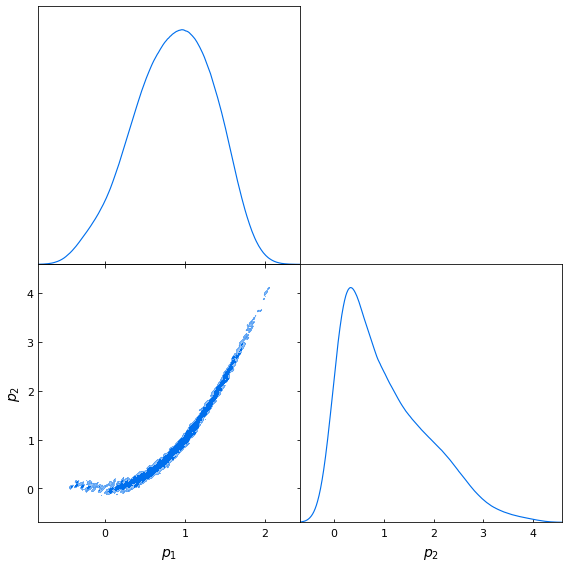

In [8]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)